In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
df = pd.read_csv("boston_housing.csv")

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
x = df.drop(columns=['MEDV'])
y = df['MEDV']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state=42)

In [14]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
model = Sequential([
    Dense(64,activation = 'relu',input_shape = (13,)),
    Dense(64,activation = 'relu'),
    Dense(1)
])

model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [20]:
early_stop = EarlyStopping(monitor = 'val_loss',patience=10,restore_best_weights = True)

history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=200,batch_size=64,verbose=2,callbacks = early_stop)



Epoch 1/200
7/7 - 1s - loss: 600.4212 - mae: 22.6763 - val_loss: 516.8690 - val_mae: 21.0222 - 1s/epoch - 174ms/step
Epoch 2/200
7/7 - 0s - loss: 571.2498 - mae: 22.0317 - val_loss: 490.6732 - val_mae: 20.4073 - 60ms/epoch - 9ms/step
Epoch 3/200
7/7 - 0s - loss: 541.2706 - mae: 21.3708 - val_loss: 462.0956 - val_mae: 19.7193 - 62ms/epoch - 9ms/step
Epoch 4/200
7/7 - 0s - loss: 508.1670 - mae: 20.6023 - val_loss: 428.8744 - val_mae: 18.8838 - 62ms/epoch - 9ms/step
Epoch 5/200
7/7 - 0s - loss: 469.4098 - mae: 19.6707 - val_loss: 389.6989 - val_mae: 17.8703 - 58ms/epoch - 8ms/step
Epoch 6/200
7/7 - 0s - loss: 424.2859 - mae: 18.5392 - val_loss: 343.7054 - val_mae: 16.6735 - 58ms/epoch - 8ms/step
Epoch 7/200
7/7 - 0s - loss: 370.6499 - mae: 17.1530 - val_loss: 291.9715 - val_mae: 15.2131 - 48ms/epoch - 7ms/step
Epoch 8/200
7/7 - 0s - loss: 312.3368 - mae: 15.5311 - val_loss: 235.9349 - val_mae: 13.4903 - 51ms/epoch - 7ms/step
Epoch 9/200
7/7 - 0s - loss: 250.9327 - mae: 13.6778 - val_loss:

In [21]:
loss,mae = model.evaluate(x_test,y_test,verbose=2)

4/4 - 0s - loss: 11.4045 - mae: 2.2415 - 54ms/epoch - 13ms/step


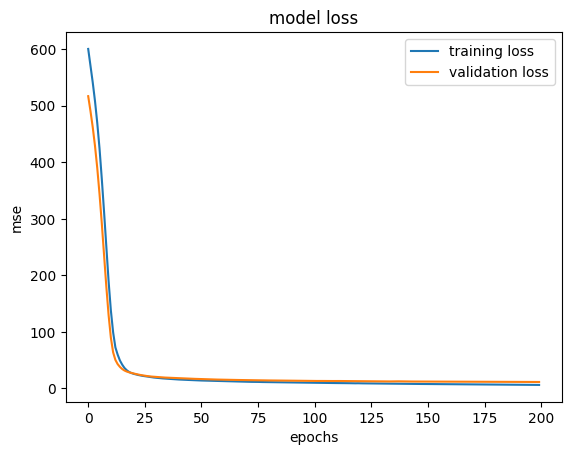

In [23]:
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.legend()
plt.title('model loss')
plt.show()

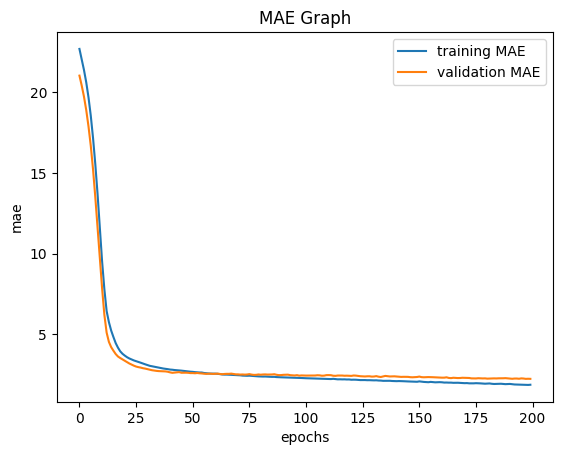

In [26]:
plt.plot(history.history['mae'],label='training MAE')
plt.plot(history.history['val_mae'],label = 'validation MAE')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend()
plt.title('MAE Graph')
plt.show()

4/4 [==============================] - 0s 3ms/step


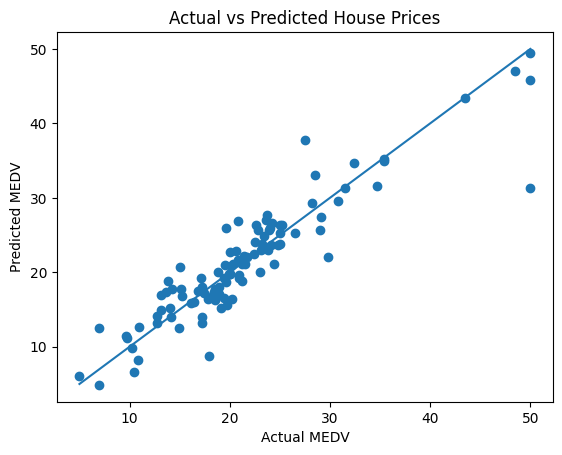

In [35]:
# Predict the house prices on test data
y_pred = model.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted House Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])  # Line y=x

plt.show()
